In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']

In [3]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [12]:
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [6]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
def get_time_and_accuracy_logreg(train_x, train_y, test_x, test_y):
        log_reg_model = LogisticRegression(max_iter=1000)
        from time import time
        start_time = time()
        log_reg_model.fit(train_x, train_y)
        end_time = time()
        time_train = end_time-start_time
        preds = log_reg_model.predict(test_x)
        score = accuracy_score(test_y, preds)
        return time_train, score

In [9]:
model_pca_time, model_pca_acc = get_time_and_accuracy_logreg(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
model_time, model_acc = get_time_and_accuracy_logreg(train_x, train_y, test_x, test_y)

KeyboardInterrupt: 

In [ ]:
print(f"Модель, построенная на всех признаках: Время обучения {model_time}, метрика модели {model_acc}")


Модель, построенная на всех признаках: Время обучения 234.36497855186462, метрика модели 0.9187142857142857


In [ ]:
from sklearn.manifold import TSNE


In [15]:
# pca = PCA(100, random_state=42)
# pca.fit(train_x)
# train_x_pca = pca.transform(train_x)
# test_x_pca = pca.transform(test_x)

c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

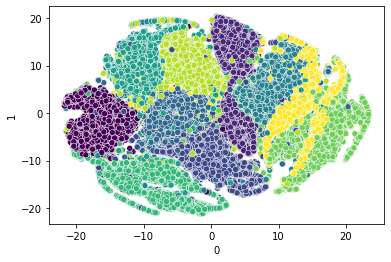

In [14]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
X_reduced = tsne.fit_transform(train_x)
df_tsne = pd.DataFrame(X_reduced)
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])
